In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
df = pd.read_csv("data_preprocessed.csv")
df.head()

,customer_id,age,gender_cd,region_size,foreign_flg,entrepreneur_flg,auto_flg,traveler_flg,partnership_flg,child_amt,...,emp_gender_cd,emp_children_cnt,emp_work_months_cnt,emp_citizenship_country_cd,emp_marital_status_cd,day_of_week,holiday_flg,million_city,child_flg,approval_flg
0,139895392,42.0,1.0,msk,0.0,0.0,1.0,0.0,1.0,0.0,...,NaN,NaN,0.0,NaN,NaN,2,0,1.0,0,0
1,342841087,40.0,0.0,town,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,NaN,82.0,NaN,NaN,4,0,0.0,1,0
2,104017416,30.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,6,1,NaN,0,0
3,579880064,65.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,4,0,NaN,0,0
4,124379737,28.0,1.0,msk,0.0,0.0,1.0,0.0,1.0,1.0,...,NaN,NaN,0.0,NaN,NaN,4,0,1.0,1,0


In [82]:
df.shape

(18691, 34)

In [83]:
df["bundle_nm"].value_counts().sum()

18691

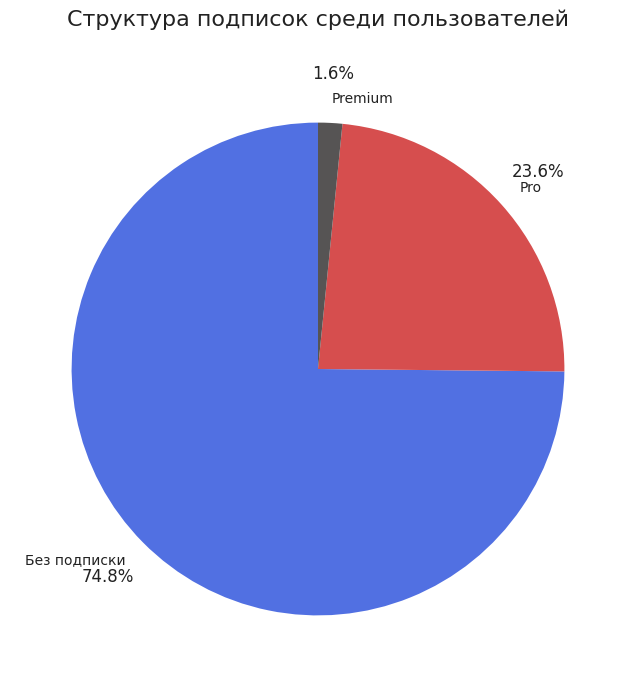

In [84]:
# Customizing our pie chart
colors = ['#5170E2', '#D64E4E', '#565454']
subs = df["bundle_nm"].value_counts()
bundle_group_labels = df["bundle_nm"].unique()
font_color = '#222222'

plt.rcParams.update({
'font.size': 12, # Общий размер шрифта для текста
'axes.titlesize': 14, # Размер шрифта для заголовков осей
'axes.labelsize': 12, # Размер шрифта для подписей осей
'xtick.labelsize': 10, # Размер шрифта для меток на оси X
'ytick.labelsize': 10 # Размер шрифта для меток на оси Y
})

plt.figure(figsize=(8, 8))
plt.pie(subs, labels=bundle_group_labels, autopct='%1.1f%%', startangle=90, colors=colors, pctdistance=1.2, radius=1, textprops={'color':font_color})
title = plt.title('Структура подписок среди пользователей', fontsize=16, color=font_color, pad=25)
plt.savefig('pie_chart.png', format='png')
plt.show()
        

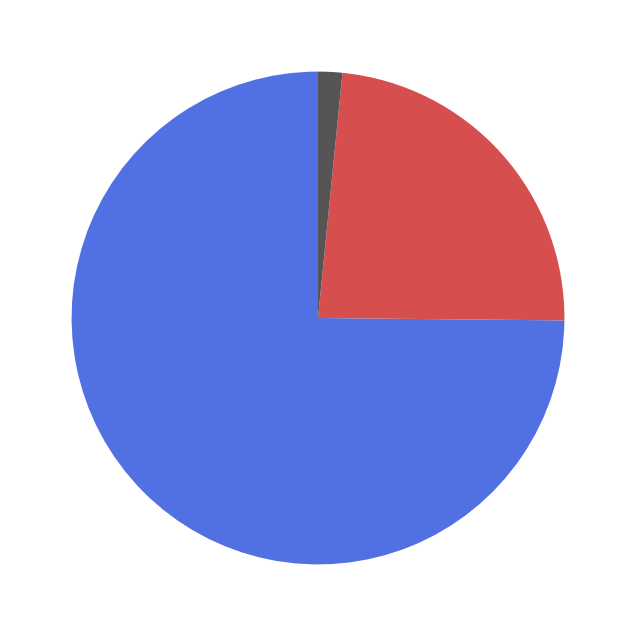

In [85]:
colors = ['#5170E2', '#D64E4E', '#565454']
subs = df["bundle_nm"].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(subs, startangle=90, colors=colors)
plt.savefig('pie_chart.png', format='png')
plt.show()

In [86]:
df["realty_type"].isna().sum()

7289

In [87]:
df['product_cd'].value_counts() / len(df['product_cd']) * 100

product_cd
Credit Cards          52.645658
Cash Loan             14.343802
MVNO                  10.181371
Debit Cards           10.090418
Investment             4.654647
Secured Loan           2.589482
Mortgage Insurance     1.995613
Casco                  1.712054
Car Loan               1.551549
Osago                  0.139104
Deposit                0.058852
Travel Avia            0.026751
T-Auto                 0.010700
Name: count, dtype: float64

In [88]:
counts = df['product_cd'].value_counts()
percentages = 100 * counts / counts.sum()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20496\2656568548.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=counts.index, y=percentages, palette=['#5170E2'])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_20496\2656568548.py:2: UserWarning: 
The palette list has fewer values (1) than needed (13) and will cycle, which may produce an uninterpretable plot.
  bar_plot = sns.barplot(x=counts.index, y=percentages, palette=['#5170E2'])


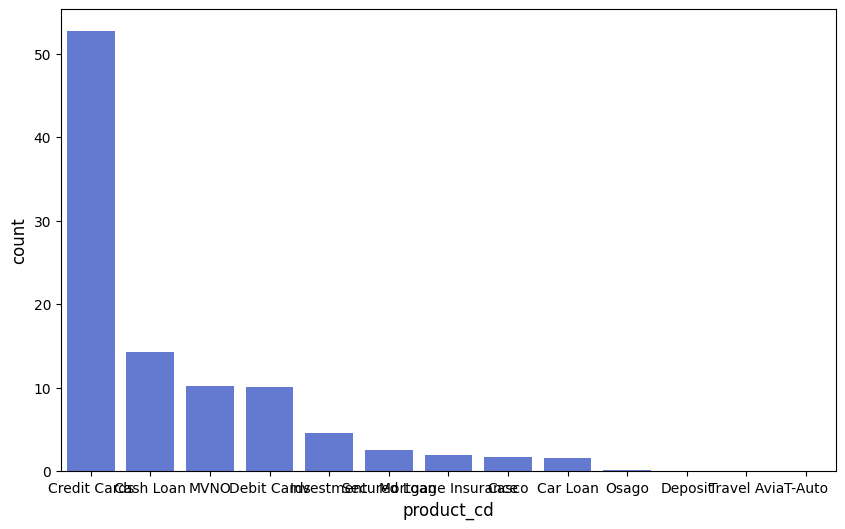

In [89]:
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x=counts.index, y=percentages, palette=['#5170E2'])
plt.savefig('product_cd.png')
plt.show()

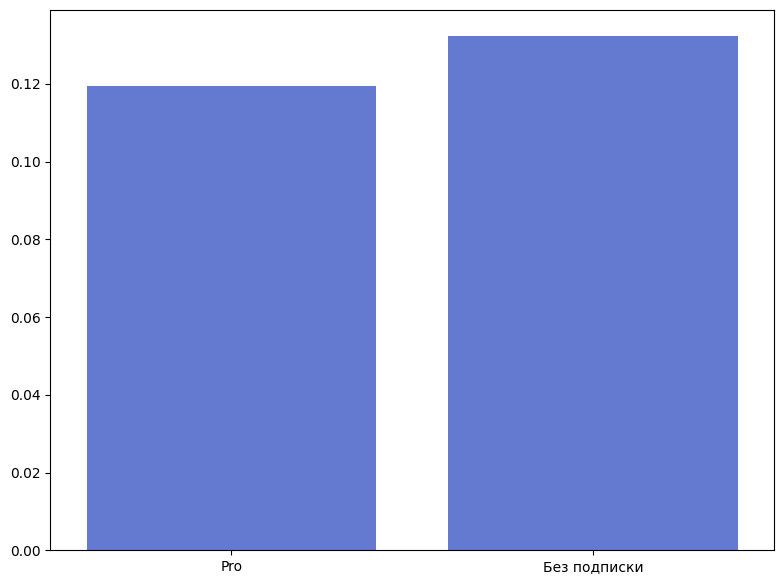

In [90]:
plt.figure(figsize=(8, 6))

df = df.loc[df["bundle_nm"] != 'Premium']
sns.barplot(df.groupby("bundle_nm")["approval_flg"].mean(), color="#5170E2") #  "#3962FA"-"#5170E2"    "#ED3737"-"#D64E4E"

plt.xlabel("")
plt.ylabel("")

plt.tight_layout()
plt.show()

In [91]:
df.groupby("bundle_nm")["approval_flg"].mean()

bundle_nm
Pro             0.119383
Без подписки    0.132390
Name: approval_flg, dtype: float64

In [92]:
df = pd.read_csv("data_final_preprocessed.csv")
df = df.loc[df["bundle_nm"] != 'Premium']

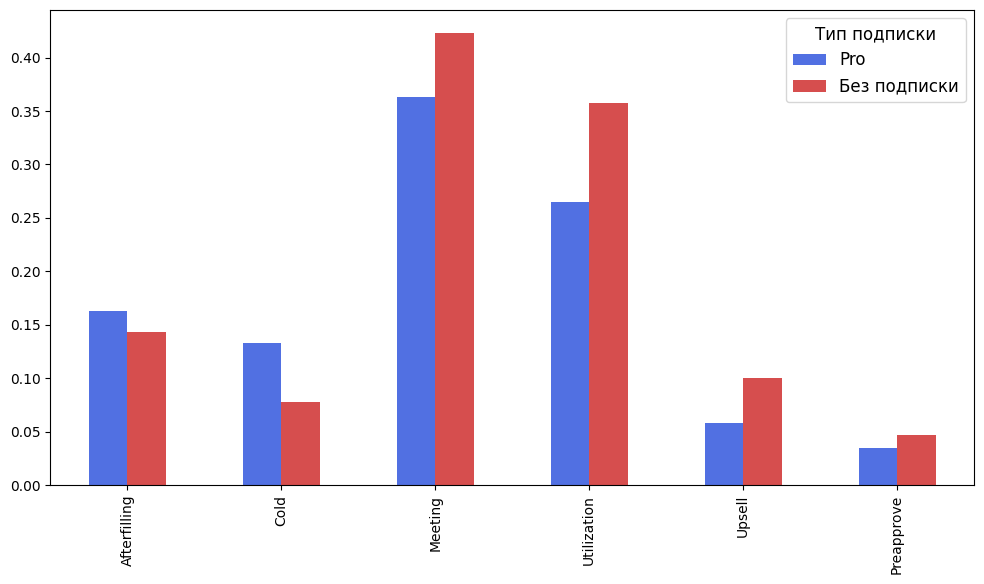

In [93]:
df_func = df[df['functional_cd'].isin(['Preapprove', 'Afterfilling', 'Utilization', 'Cold', 'Upsell', 'Meeting'])]
grouped = df_func.groupby(['functional_cd', 'bundle_nm']).agg(
    success_count=('approval_flg', lambda x: (x == 1).sum()),
    total_count=('approval_flg', 'count')
).reset_index()

grouped['success_rate'] = grouped['success_count'] / grouped['total_count']
pivot_table = grouped.pivot(index='functional_cd', columns='bundle_nm', values='success_rate')


# Добавляем флаг: успехи без подписки меньше успехов с подпиской
pivot_table['no_subscription_lower'] = pivot_table.iloc[:, 0] < pivot_table.iloc[:, 1]

# Сортируем:
# 1. Сначала по флагу "без подписки меньше" (True слева, False справа)
# 2. Затем по успехам без подписки (по убыванию)
sorted_pivot = pivot_table.sort_values(
    by=['no_subscription_lower', pivot_table.columns[0]], 
    ascending=[True, False]
)

# Удаляем вспомогательные столбцы
sorted_pivot = sorted_pivot.drop(columns=['no_subscription_lower'])

# График с указанием цветов
sorted_pivot.plot(
    kind='bar',
    figsize=(10, 6),
    color=["#5170E2", "#D64E4E"]  # Указанные цвета
)

# Настройка заголовков и подписей
plt.legend(title='Тип подписки')
plt.xlabel("")
plt.tight_layout()
plt.show()


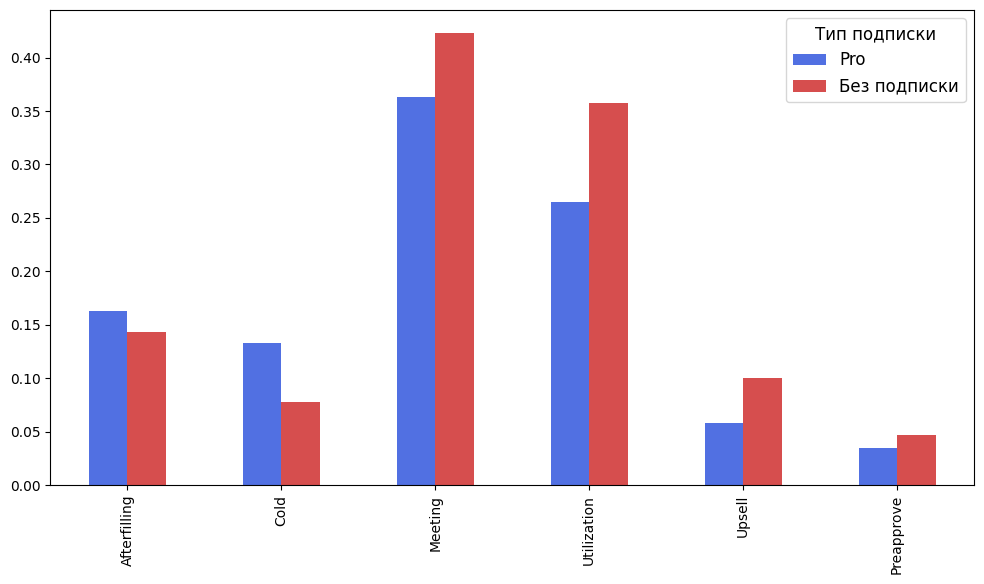

In [94]:
df_func = df[df['functional_cd'] == 'Utilization']
grouped = df_func.groupby(['product_cd', 'bundle_nm']).agg(
    success_count=('approval_flg', lambda x: (x == 1).sum()),
    total_count=('approval_flg', 'count')
).reset_index()

grouped['success_rate'] = grouped['success_count'] / grouped['total_count']
pivot_table = grouped.pivot(index='product_cd', columns='bundle_nm', values='success_rate')


# # Добавляем флаг: успехи без подписки меньше успехов с подпиской
# pivot_table['no_subscription_lower'] = pivot_table.iloc[:, 0] < pivot_table.iloc[:, 1]

# # Сортируем:
# # 1. Сначала по флагу "без подписки меньше" (True слева, False справа)
# # 2. Затем по успехам без подписки (по убыванию)
# sorted_pivot = pivot_table.sort_values(
#     by=['no_subscription_lower', pivot_table.columns[0]], 
#     ascending=[True, False]
# )

# # Удаляем вспомогательные столбцы
# sorted_pivot = sorted_pivot.drop(columns=['no_subscription_lower'])

# График с указанием цветов
sorted_pivot.plot(
    kind='bar',
    figsize=(10, 6),
    color=["#5170E2", "#D64E4E"]  # Указанные цвета
)

# Настройка заголовков и подписей
plt.legend(title='Тип подписки')
plt.xlabel("")
plt.tight_layout()
plt.show()


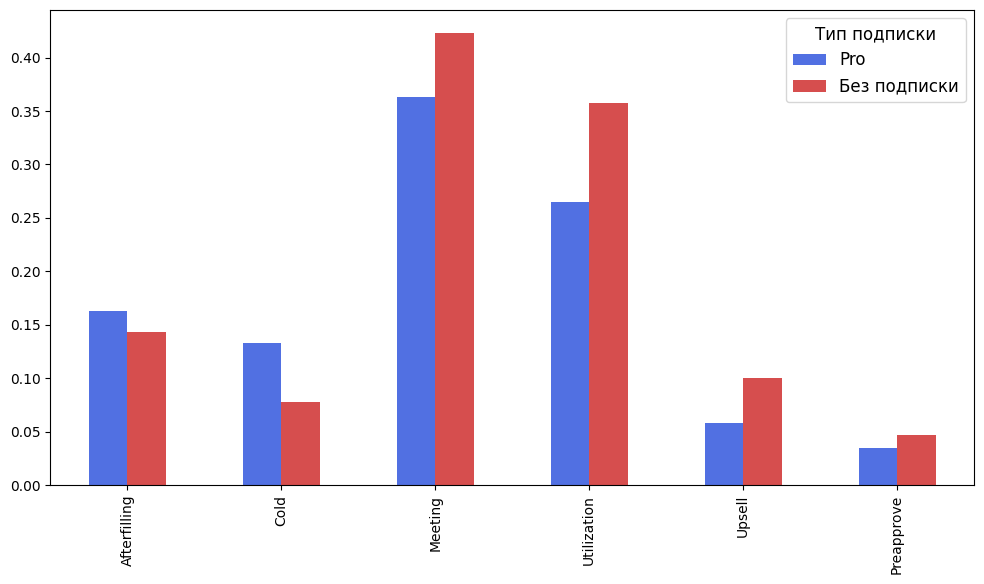

In [95]:
df_func = df[df['functional_cd'] == 'Utilization']
grouped = df_func.groupby(['product_cd', 'bundle_nm']).agg(
    success_count=('approval_flg', lambda x: (x == 1).sum()),
    total_count=('approval_flg', 'count')
).reset_index()

grouped['success_rate'] = grouped['success_count'] / grouped['total_count']
pivot_table = grouped.pivot(index='product_cd', columns='bundle_nm', values='success_rate')


# График с указанием цветов
sorted_pivot.plot(
    kind='bar',
    figsize=(10, 6),
    color=["#5170E2", "#D64E4E"]  # Указанные цвета
)

# Настройка заголовков и подписей
plt.legend(title='Тип подписки')
plt.xlabel("")
plt.tight_layout()
plt.show()
